In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set2")

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load data
df1 = pd.read_csv("../../Hanoi-Housing-Prices-Prediction/Feature engineering/thoa_thuan_chungcu.csv")
df2 = pd.read_csv("../../Hanoi-Housing-Prices-Prediction/Feature engineering/remaining_chungcu.csv")

df2_subset = df2.head(2679)
df = pd.concat([df1, df2_subset], ignore_index=True)

df_columns = df.columns.tolist() 
print("+ Shape: ", df.shape) # (Number of Lines, Number of Columns)
print("+ Column: ", df_columns) # Name the attribute columns.
df.info()

+ Shape:  (5358, 29)
+ Column:  ['Dự án', 'Đường/Phố', 'Phường/Xã', 'Quận/Huyện', 'Phân loại quận', 'Loại tin', 'Mã tin', 'Diện tích', 'Mức giá', 'Hướng nhà', 'Hướng ban công', 'Số phòng ngủ', 'Số toilet', 'Pháp lý', 'Nội thất', 'Loại hình chung cư', 'Nhóm 1-Trường học', 'Nhóm 1-Chợ/Siêu thị', 'Nhóm 1-Bệnh viện', 'Nhóm 2-Công viên', 'Nhóm 2-Bể bơi', 'Nhóm 2-Gym', 'Slot ô tô', 'Nhà thoáng', 'Hiện đại', 'Bán gấp', 'Lô góc', 'Hỗ trợ vay', 'Tầng']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5358 entries, 0 to 5357
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dự án                5358 non-null   object 
 1   Đường/Phố            4128 non-null   object 
 2   Phường/Xã            5284 non-null   object 
 3   Quận/Huyện           5358 non-null   object 
 4   Phân loại quận       5358 non-null   object 
 5   Loại tin             5358 non-null   object 
 6   Mã tin               5358 non-null   int

In [3]:
df

,Dự án,Đường/Phố,Phường/Xã,Quận/Huyện,Phân loại quận,Loại tin,Mã tin,Diện tích,Mức giá,Hướng nhà,...,Nhóm 2-Công viên,Nhóm 2-Bể bơi,Nhóm 2-Gym,Slot ô tô,Nhà thoáng,Hiện đại,Bán gấp,Lô góc,Hỗ trợ vay,Tầng
0,The Park Home,Thành Thái,Dịch Vọng,Cầu Giấy,Nội thành,Tin thường,39200019,120.4,Thỏa thuận,Đông - Nam,...,1,0,0,1,1,0,0,1,0,NaN
1,Handico Complex,Lê Văn Lương,Nhân Chính,Thanh Xuân,Nội thành,Tin thường,39175873,71.0,Thỏa thuận,NaN,...,0,0,0,1,0,0,0,0,1,NaN
2,N01-T6 Ngoại Giao Đoàn,NaN,NaN,Bắc Từ Liêm,Nội thành,Tin thường,38579968,143.0,Thỏa thuận,Nam,...,0,0,0,0,1,0,0,0,0,NaN
3,FLC Landmark Tower,Lê Đức Thọ,Mỹ Đình 2,Nam Từ Liêm,Nội thành,Tin thường,38631766,159.0,Thỏa thuận,NaN,...,0,0,0,0,0,0,1,0,0,NaN
4,HH4 Linh Đàm,Linh,Hoàng Liệt,Hoàng Mai,Nội thành,Tin thường,39195369,76.0,Thỏa thuận,NaN,...,0,0,0,0,0,0,1,0,1,Trung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5353,KĐT Cổ Nhuế,Hoàng Quốc Việt,Cổ Nhuế 1,Bắc Từ Liêm,Nội thành,Tin thường,39155444,83.0,45.0,NaN,...,0,0,0,0,0,0,1,1,0,NaN
5354,Viện bỏng Lê Hữu Trác,Cầu Bươu,Tân Triều,Thanh Trì,Ngoại thành,Tin thường,39140320,63.0,34.8,Tây - Nam,...,0,0,0,0,0,0,0,0,0,NaN
5355,King Palace,Nguyễn Trãi,Thượng Đình,Thanh Xuân,Nội thành,Tin thường,29584364,126.0,59.5,Tây - Bắc,...,0,0,0,0,0,1,1,0,0,Trung
5356,Feliz Homes,NaN,Hoàng Văn Thụ,Hoàng Mai,Nội thành,Tin thường,38334958,77.0,45.5,NaN,...,0,0,0,0,0,0,0,0,1,NaN


In [4]:
df.isnull().sum()/df.shape[0] * 100.00

Dự án                   0.000000
Đường/Phố              22.956327
Phường/Xã               1.381112
Quận/Huyện              0.000000
Phân loại quận          0.000000
Loại tin                0.000000
Mã tin                  0.000000
Diện tích               0.000000
Mức giá                 0.000000
Hướng nhà              52.314296
Hướng ban công         46.920493
Số phòng ngủ            3.191489
Số toilet               8.286674
Pháp lý                 0.000000
Nội thất                0.000000
Loại hình chung cư      0.000000
Nhóm 1-Trường học       0.000000
Nhóm 1-Chợ/Siêu thị     0.000000
Nhóm 1-Bệnh viện        0.000000
Nhóm 2-Công viên        0.000000
Nhóm 2-Bể bơi           0.000000
Nhóm 2-Gym              0.000000
Slot ô tô               0.000000
Nhà thoáng              0.000000
Hiện đại                0.000000
Bán gấp                 0.000000
Lô góc                  0.000000
Hỗ trợ vay              0.000000
Tầng                   77.342292
dtype: float64

In [5]:
columns_to_drop = ['Loại tin', 'Mã tin', 'Hướng nhà', 'Hướng ban công', 'Nội thất', 'Tầng']
df.drop(columns=columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5358 entries, 0 to 5357
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dự án                5358 non-null   object 
 1   Đường/Phố            4128 non-null   object 
 2   Phường/Xã            5284 non-null   object 
 3   Quận/Huyện           5358 non-null   object 
 4   Phân loại quận       5358 non-null   object 
 5   Diện tích            5358 non-null   float64
 6   Mức giá              5358 non-null   object 
 7   Số phòng ngủ         5187 non-null   float64
 8   Số toilet            4914 non-null   float64
 9   Pháp lý              5358 non-null   object 
 10  Loại hình chung cư   5358 non-null   object 
 11  Nhóm 1-Trường học    5358 non-null   int64  
 12  Nhóm 1-Chợ/Siêu thị  5358 non-null   int64  
 13  Nhóm 1-Bệnh viện     5358 non-null   int64  
 14  Nhóm 2-Công viên     5358 non-null   int64  
 15  Nhóm 2-Bể bơi        5358 non-null   i

In [6]:
# Fill NaN
df['Phường/Xã'].fillna(df['Phường/Xã'].mode()[0], inplace=True)
df['Đường/Phố'].fillna(df['Đường/Phố'].mode()[0], inplace=True)

numeric_cols = ['Diện tích', 'Số phòng ngủ', 'Số toilet']
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

phuongloai_mapping = {'Nội thành': 1, 'Ngoại thành': 0}
df['Phân loại quận'] = df['Phân loại quận'].map(phuongloai_mapping)

# One-Hot Encoding 
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(df[['Quận/Huyện']]).toarray()
onehot_encoded_df = pd.DataFrame(onehot_encoded, 
                                 columns=onehot_encoder.get_feature_names_out(['Quận/Huyện']), 
                                 dtype=bool)
onehot_encoded_df = onehot_encoded_df * 1

onehot_encoder_phap_ly = OneHotEncoder()
phap_ly_encoded = onehot_encoder_phap_ly.fit_transform(df[['Pháp lý']]).toarray()
phap_ly_encoded_df = pd.DataFrame(phap_ly_encoded, 
                                  columns=onehot_encoder_phap_ly.get_feature_names_out(['Pháp lý']), 
                                  dtype=bool)
phap_ly_encoded_df = phap_ly_encoded_df * 1

onehot_encoder_loai_hinh_cc = OneHotEncoder()
loai_hinh_cc_encoded = onehot_encoder_loai_hinh_cc.fit_transform(df[['Loại hình chung cư']]).toarray()
loai_hinh_cc_encoded_df = pd.DataFrame(loai_hinh_cc_encoded, 
                                        columns=onehot_encoder_loai_hinh_cc.get_feature_names_out(['Loại hình chung cư']), 
                                        dtype=bool)
loai_hinh_cc_encoded_df = loai_hinh_cc_encoded_df * 1

df = pd.concat([df, onehot_encoded_df], axis=1)
df.drop(columns=['Quận/Huyện'], inplace=True)

df = pd.concat([df, phap_ly_encoded_df], axis=1)
df.drop(columns=['Pháp lý'], inplace=True)

df = pd.concat([df, loai_hinh_cc_encoded_df], axis=1)
df.drop(columns=['Loại hình chung cư'], inplace=True)

# Label Encoding 
label_encoder_px = LabelEncoder()
df['Phường/Xã'] = label_encoder_px.fit_transform(df['Phường/Xã'].str.replace("Phường ", ""))
df['Đường/Phố'] = label_encoder_px.fit_transform(df['Đường/Phố'].str.replace("Đường ", ""))
df['Dự án'] = label_encoder_px.fit_transform(df['Dự án'])

print(df)

      Dự án  Đường/Phố  Phường/Xã  Phân loại quận  Diện tích     Mức giá  \
0       624        228         19               1      120.4  Thỏa thuận   
1       303        130         70               1       71.0  Thỏa thuận   
2       428        271        110               1      143.0  Thỏa thuận   
3       259        134         60               1      159.0  Thỏa thuận   
4       295        119         28               1       76.0  Thỏa thuận   
...     ...        ...        ...             ...        ...         ...   
5353    370         91         13               1       83.0        45.0   
5354    702         67        124               0       63.0        34.8   
5355    367        176        104               1      126.0        59.5   
5356    262        271         29               1       77.0        45.5   
5357    654        130         70               1      115.0        50.4   

      Số phòng ngủ  Số toilet  Nhóm 1-Trường học  Nhóm 1-Chợ/Siêu thị  ...  \
0        

In [7]:
df.isnull().sum()/df.shape[0] * 100.00

Dự án                                     0.0
Đường/Phố                                 0.0
Phường/Xã                                 0.0
Phân loại quận                            0.0
Diện tích                                 0.0
Mức giá                                   0.0
Số phòng ngủ                              0.0
Số toilet                                 0.0
Nhóm 1-Trường học                         0.0
Nhóm 1-Chợ/Siêu thị                       0.0
Nhóm 1-Bệnh viện                          0.0
Nhóm 2-Công viên                          0.0
Nhóm 2-Bể bơi                             0.0
Nhóm 2-Gym                                0.0
Slot ô tô                                 0.0
Nhà thoáng                                0.0
Hiện đại                                  0.0
Bán gấp                                   0.0
Lô góc                                    0.0
Hỗ trợ vay                                0.0
Quận/Huyện_Ba Đình                        0.0
Quận/Huyện_Bắc Từ Liêm            

In [8]:
df

,Dự án,Đường/Phố,Phường/Xã,Phân loại quận,Diện tích,Mức giá,Số phòng ngủ,Số toilet,Nhóm 1-Trường học,Nhóm 1-Chợ/Siêu thị,...,Quận/Huyện_Đông Anh,Quận/Huyện_Đống Đa,Pháp lý_Hợp đồng mua bán,Pháp lý_Khác,Pháp lý_Sổ chung,"Pháp lý_Sổ đỏ, sổ hồng, pháp lý đầy đủ",Pháp lý_Đang chờ sổ,Loại hình chung cư_Chung cư,Loại hình chung cư_Chung cư mini,Loại hình chung cư_Nhà tập thể
0,624,228,19,1,120.4,Thỏa thuận,3.0,2.000000,1,0,...,0,0,0,0,0,1,0,1,0,0
1,303,130,70,1,71.0,Thỏa thuận,2.0,2.000000,1,0,...,0,0,0,0,0,1,0,1,0,0
2,428,271,110,1,143.0,Thỏa thuận,4.0,3.000000,0,0,...,0,0,1,0,0,0,0,1,0,0
3,259,134,60,1,159.0,Thỏa thuận,3.0,2.000000,0,0,...,0,0,0,0,0,1,0,1,0,0
4,295,119,28,1,76.0,Thỏa thuận,2.0,2.000000,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5353,370,91,13,1,83.0,45.0,2.0,2.000000,0,0,...,0,0,0,0,0,1,0,1,0,0
5354,702,67,124,0,63.0,34.8,2.0,1.000000,0,0,...,0,0,0,0,0,1,0,1,0,0
5355,367,176,104,1,126.0,59.5,3.0,2.000000,0,0,...,0,0,0,1,0,0,0,1,0,0
5356,262,271,29,1,77.0,45.5,2.0,1.986772,0,0,...,0,0,0,0,0,1,0,1,0,0


In [9]:
# Remove rows with "Thỏa thuận" price
df_processed = df[df['Mức giá'] != 'Thỏa thuận'].copy()

# Select features and target columns
X = df_processed.drop(columns=['Mức giá'])
y = df_processed['Mức giá'].astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2411, 47) (2411,) (268, 47) (268,)


In [10]:
# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict prices for rows with "Thỏa thuận" price
df_thoa_thuan = df[df['Mức giá'] == 'Thỏa thuận']
X_thoa_thuan = df_thoa_thuan.drop(columns=['Mức giá'])

# Predict prices
predicted_prices = model.predict(X_thoa_thuan)

In [11]:
# Replace "Thỏa thuận" prices with predicted values
df.loc[df['Mức giá'] == 'Thỏa thuận', 'Mức giá'] = predicted_prices

df

,Dự án,Đường/Phố,Phường/Xã,Phân loại quận,Diện tích,Mức giá,Số phòng ngủ,Số toilet,Nhóm 1-Trường học,Nhóm 1-Chợ/Siêu thị,...,Quận/Huyện_Đông Anh,Quận/Huyện_Đống Đa,Pháp lý_Hợp đồng mua bán,Pháp lý_Khác,Pháp lý_Sổ chung,"Pháp lý_Sổ đỏ, sổ hồng, pháp lý đầy đủ",Pháp lý_Đang chờ sổ,Loại hình chung cư_Chung cư,Loại hình chung cư_Chung cư mini,Loại hình chung cư_Nhà tập thể
0,624,228,19,1,120.4,60.422333,3.0,2.000000,1,0,...,0,0,0,0,0,1,0,1,0,0
1,303,130,70,1,71.0,59.5121,2.0,2.000000,1,0,...,0,0,0,0,0,1,0,1,0,0
2,428,271,110,1,143.0,56.568733,4.0,3.000000,0,0,...,0,0,1,0,0,0,0,1,0,0
3,259,134,60,1,159.0,42.263883,3.0,2.000000,0,0,...,0,0,0,0,0,1,0,1,0,0
4,295,119,28,1,76.0,28.587,2.0,2.000000,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5353,370,91,13,1,83.0,45.0,2.0,2.000000,0,0,...,0,0,0,0,0,1,0,1,0,0
5354,702,67,124,0,63.0,34.8,2.0,1.000000,0,0,...,0,0,0,0,0,1,0,1,0,0
5355,367,176,104,1,126.0,59.5,3.0,2.000000,0,0,...,0,0,0,1,0,0,0,1,0,0
5356,262,271,29,1,77.0,45.5,2.0,1.986772,0,0,...,0,0,0,0,0,1,0,1,0,0


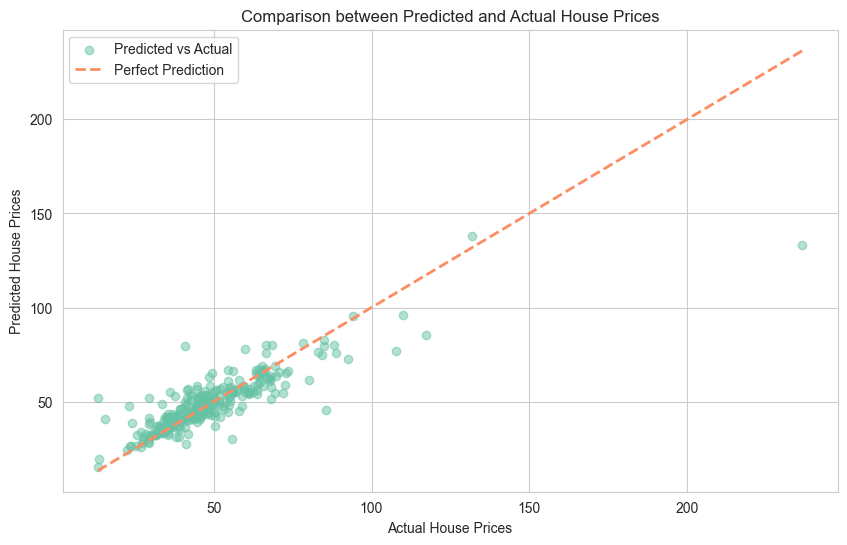

In [12]:
# Predict house prices
predicted_prices = model.predict(X_test)

# Plot a comparison between predicted and actual house prices
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test, predicted_prices, color=sns.color_palette("Set2")[0], alpha=0.5, label='Predicted vs Actual')  

# Plot the diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color=sns.color_palette("Set2")[1], linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Comparison between Predicted and Actual House Prices')
plt.legend()
plt.show()

In [13]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_prices)

# Calculate R^2 score
r2 = r2_score(y_test, predicted_prices)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

RMSE: 10.65024712974167
MAE: 6.060083617626154
R^2: 0.7265986187662775


Tuning

Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 12.128904558350644
MAE: 7.052317708333334
R^2: 0.6454116269957806


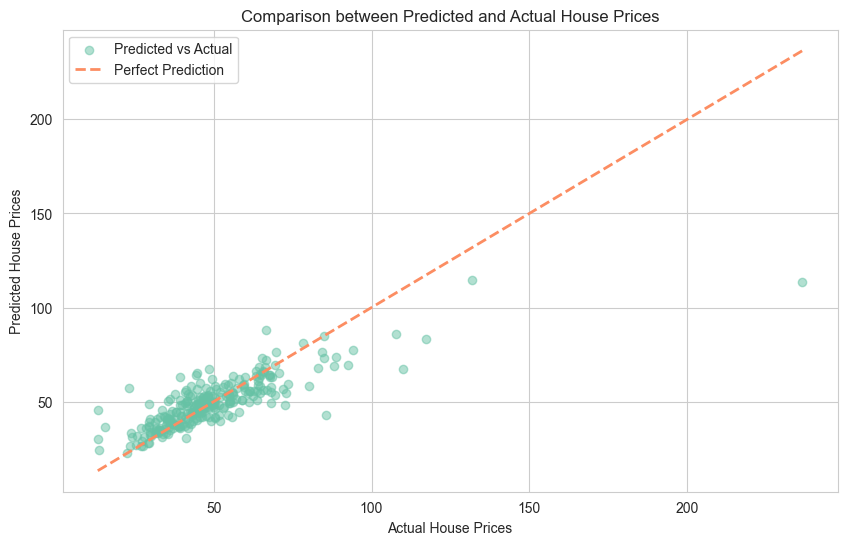

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict house prices using the best model
predicted_prices = best_model.predict(X_test)

# Calculate RMSE, MAE, and R^2
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))
mae = mean_absolute_error(y_test, predicted_prices)
r2 = r2_score(y_test, predicted_prices)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

# Plot a comparison between predicted and actual house prices
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test, predicted_prices, color=sns.color_palette("Set2")[0], alpha=0.5, label='Predicted vs Actual')  

# Plot the diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color=sns.color_palette("Set2")[1], linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Comparison between Predicted and Actual House Prices')
plt.legend()
plt.show()